<img src="https://www.sccpre.cat/mypng/full/403-4035365_tec-logo-png-logo-tec-de-monterrey.png"
        width="100"  style="float: left; margin-right: 10px;" /> 
       <div>
       <h1>Regresión Lineal Simple Caso Práctico</h1>
       <h4>Rezago Educativo y Pobreza<br>Armando Valdés López<br>Septiembre 2019</h4>
       </div>
     

In [6]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

## 01.-Entendimiento del Negocio

## 02.- Entendimiento de los Datos

In [7]:
Base_de_Datos= pd.read_excel('educacion_basica_incompleta_2010.xlsx')
Datos=pd.DataFrame(Base_de_Datos)
Datos.head(7)

,por_per_pob,por_per_ebi
0,30.531104,30.908560
1,67.111172,49.764099
2,61.360527,57.006229
3,52.800458,43.329239
4,45.338512,43.037182
5,46.958330,38.838032
6,56.136204,39.010590


In [8]:
print("Descripción de los Datos")
print("Observaciones y Variables",Datos.shape)
summary = Datos.describe()
print(" ")
print("Resumen de Datos Cuantitativos")
print(summary)

Descripción de los Datos
Observaciones y Variables (2456, 2)
 
Resumen de Datos Cuantitativos
       por_per_pob  por_per_ebi
count  2456.000000  2456.000000
mean     67.421505    59.373674
std      18.516378    14.650864
min       8.745311     9.627710
25%      55.622230    49.849097
50%      69.862685    61.238411
75%      82.551284    69.759018
max      97.350405    94.378319


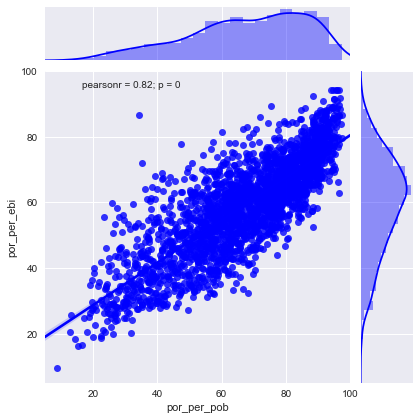

In [9]:
sns.set(style="darkgrid")
g = sns.jointplot("por_per_pob","por_per_ebi", data=Datos,kind="reg",
                  xlim=(5,100) , ylim=(5, 100), color="b")

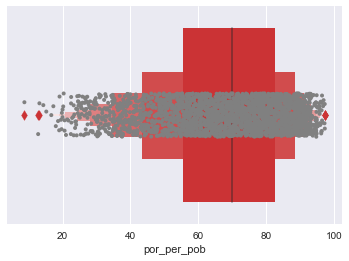

In [13]:
ax=sns.lvplot( x="por_per_pob",data=Datos, palette="Set1")
#ax =sns.stripplot(x="por_per_pob", data=Datos, size=4, jitter=True, color="gray")


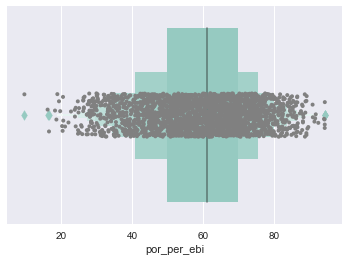

In [14]:
ax=sns.lvplot( x="por_per_ebi",data=Datos, palette="Set3")
#ax =sns.stripplot(x="por_per_ebi", data=Datos, size=4, jitter=True, color="gray")

## 03.-Preparación de los Datos

## 04.-Modelado

In [16]:
x=np.array(Datos.por_per_pob).reshape((-1,1))
y=np.array(Datos.por_per_ebi)

### a.- Modelo de Regresión Lineal

In [155]:
model1=LinearRegression()
model1.fit(x,y)
R_sq1=model1.score(x,y)
y_pred1=model1.predict(x)
ecm1=mean_squared_error(y,y_pred1)
rms1 = sqrt(mean_squared_error(y,y_pred1))

## 05.-Evaluación

### a'.- Evaluación Regresión Lineal

In [156]:
print("Intercepto a",model1.intercept_)
print("Pendiente b",model1.coef_)
print("Coeficiente de determinación",R_sq1)
print("Error cuadrático medio",ecm1)
print("Raiz del error cuadrático medio", rms1)
print("y = "+ str(model1.intercept_) + " + "+ str(model1.coef_) +"*"+"x" )

Intercepto a 15.7343638161
Pendiente b [ 0.64726098]
Coeficiente de determinación 0.669182275189
Error cuadrático medio 70.9803923342
Raiz del error cuadrático medio 8.42498619192849
y = 15.7343638161 + [ 0.64726098]*x


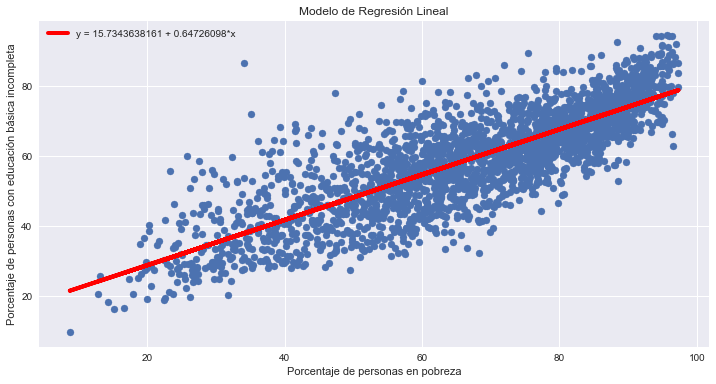

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(x, y)
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Porcentaje de personas en pobreza")
plt.ylabel("Porcentaje de personas con educación básica incompleta")
plt.plot(x,y_pred1,color="red",linewidth=4)
plt.legend(["y = 15.7343638161 + 0.64726098*x"], loc="upper left")

plt.show()

*********************************************************************************************************

In [149]:
X=np.array(Datos.por_per_pob).reshape((-1,1))
Y=np.array(Datos.por_per_ebi)

In [157]:
#separo los datos train y test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=445)

In [158]:
model2=LinearRegression()
model2.fit(X_train,Y_train)
Y_pred2=model2.predict(X_test)
R_sq2=model2.score(X_test,Y_test)
ecm2=mean_squared_error(Y_test,Y_pred2)
rms2 = sqrt(mean_squared_error(Y_test,Y_pred2))

In [159]:
print("Intercepto a",model2.intercept_)
print("Pendiente b",model2.coef_)
print("Coeficiente de determinación",R_sq2)
print("Error cuadrático medio",ecm2)
print("Raiz del error cuadrático medio", rms2)
print("y = "+ str(model2.intercept_) + " + "+ str(model1.coef_) +"*"+"x" )

Intercepto a 16.1135423269
Pendiente b [ 0.64302689]
Coeficiente de determinación 0.682960237605
Error cuadrático medio 69.9997542253
Raiz del error cuadrático medio 8.366585577479071
y = 16.1135423269 + [ 0.64726098]*x


In [160]:
print("Intercepto a",model1.intercept_)
print("Pendiente b",model1.coef_)
print("Coeficiente de determinación",R_sq1)
print("Error cuadrático medio",ecm1)
print("Raiz del error cuadrático medio", rms1)
print("y = "+ str(model1.intercept_) + " + "+ str(model1.coef_) +"*"+"x" )

Intercepto a 15.7343638161
Pendiente b [ 0.64726098]
Coeficiente de determinación 0.669182275189
Error cuadrático medio 70.9803923342
Raiz del error cuadrático medio 8.42498619192849
y = 15.7343638161 + [ 0.64726098]*x


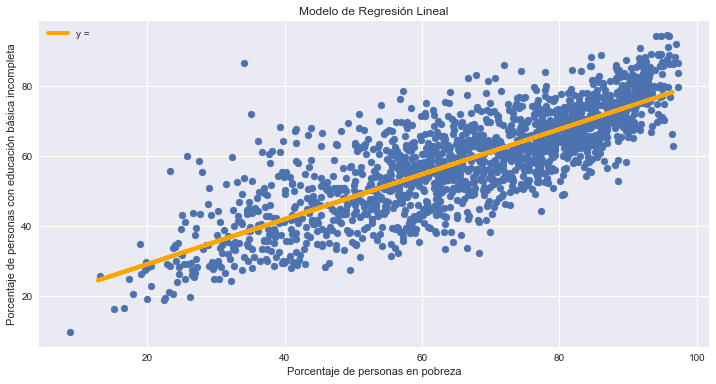

In [165]:
#visualizando datos entrenamiento
plt.figure(figsize=(12,6))
plt.scatter(X_train, Y_train)
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Porcentaje de personas en pobreza")
plt.ylabel("Porcentaje de personas con educación básica incompleta")
plt.plot(X_test,Y_pred2,color="orange",linewidth=4)
plt.legend(["y = "], loc="upper left")

plt.show()

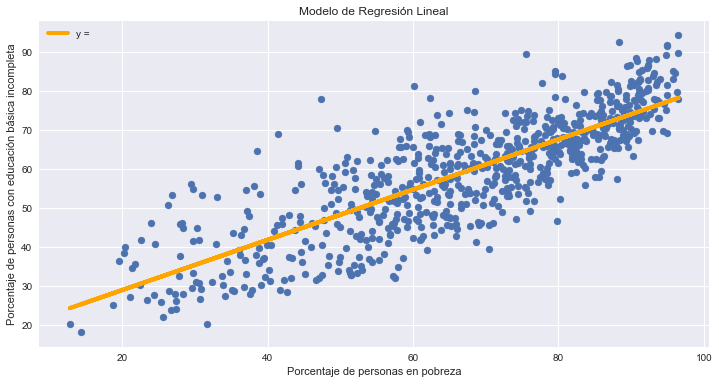

In [166]:
#visualizando datos prueba
plt.figure(figsize=(12,6))
plt.scatter(X_test, Y_test)
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Porcentaje de personas en pobreza")
plt.ylabel("Porcentaje de personas con educación básica incompleta")
plt.plot(X_test,Y_pred2,color="orange",linewidth=4)
plt.legend(["y = "], loc="upper left")

plt.show()

In [167]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(model2,X_train,Y_train, cv=10)
print (cv_scores)

[ 0.688285    0.70242964  0.69954219  0.65966283  0.64963263  0.60969603
  0.63935201  0.59420352  0.67735884  0.68145377]


In [169]:
print("Promedio 5 CV Score", format(np.mean(cv_scores)))

Promedio 5 CV Score 0.6601616471464762
